<a href="https://colab.research.google.com/github/matjesg/deepflash2/blob/master/paper/benchmark_otsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# deepflash2 - Otsu's method benchmark

> This notebook reproduces the *Otsu's method* results of the deepflash2 [paper](https://arxiv.org/abs/2111.06693) for semantic segmentation.

- **Data**: The data is available on [Google Drive](https://drive.google.com/drive/folders/1r9AqP9qW9JThbMIvT0jhoA5mPxWEeIjs?usp=sharing). To use the data in Google Colab, create a [shortcut](https://support.google.com/drive/answer/9700156?hl=en&co=GENIE.Platform%3DDesktop) of the data folder in your personal Google Drive.

- **Models**: The trained models are also available on [Google Drive](https://drive.google.com/drive/folders/1BZRrRTDuJw5EoBqz1RWoFKZ7eq2kEwxm?usp=sharing). To use the trained models for prediction, create a [shortcut](https://support.google.com/drive/answer/9700156?hl=en&co=GENIE.Platform%3DDesktop) of the data folder in your personal Google Drive.


*References*:

Griebel, M., Segebarth, D., Stein, N., Schukraft, N., Tovote, P., Blum, R., & Flath, C. M. (2021). Deep-learning in the bioimaging wild: Handling ambiguous data with deepflash2. arXiv preprint arXiv:2111.06693.

Otsu, N. (1979). A threshold selection method from gray-level histograms. IEEE transactions on systems, man, and cybernetics, 9(1), 62-66.


## Setup

- Import packages dependecies
- Connect to drive

In [ ]:
# Imports
import imageio
import cv2
import tifffile
from pathlib import Path
from skimage.color import label2rgb
import matplotlib.pyplot as plt

In [ ]:
# Connect to drive
try:
  from google.colab import drive
  drive.mount('/gdrive')
except:
  print('Google Drive is not available.')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Settings

Choose dataset from `PV_in_HC`,  `cFOS_in_HC`, `mScarlet_in_PAG`,  `YFP_in_CTX`, `GFAP_in_HC`

In [ ]:
DATASET = 'cFOS_in_HC'
OUTPUT_PATH = Path("/content/predictions") # Save predictions here
DATA_PATH = Path('/gdrive/MyDrive/deepflash2-paper/data')

## Prediction on test set

Labels are converted and saved to
- Semantic segmentation masks (.png)
- Instance segmentation masks (.tif) using the connected components algorithm (**not used in the paper**)

To ensure reproducibilty we will use the trained models from our paper!

1444.tif


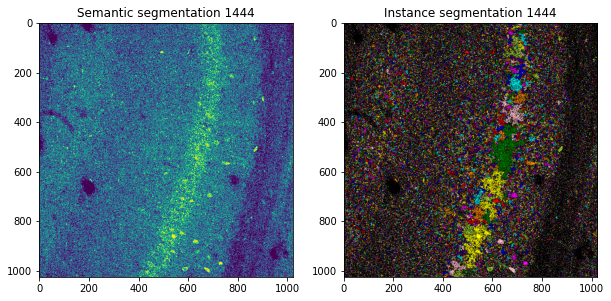

1385.tif


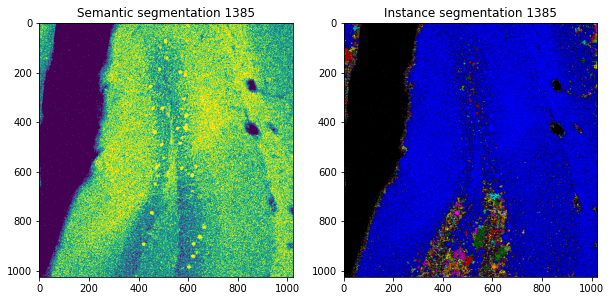

1418.tif


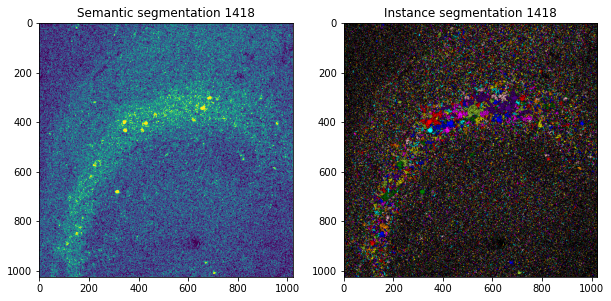

1582.tif


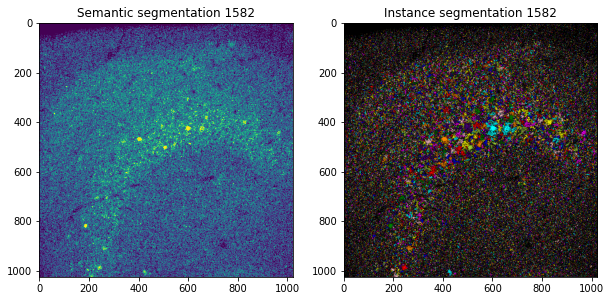

1377.tif


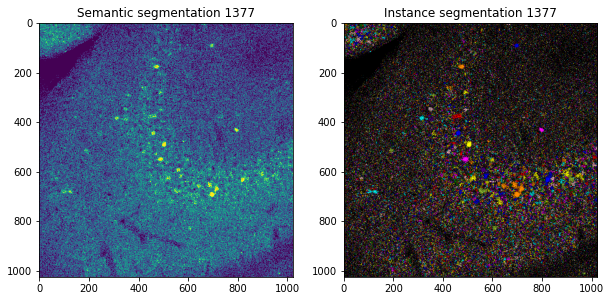

1283.tif


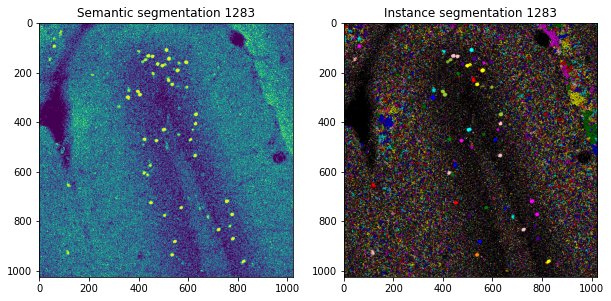

1599.tif


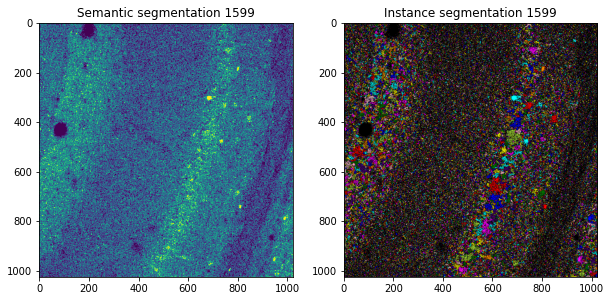

1237.tif


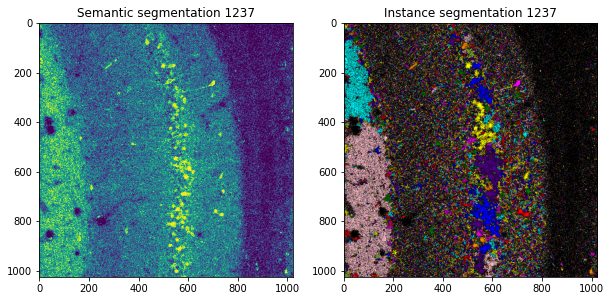

In [ ]:
test_image_path = DATA_PATH/DATASET/'test'/'images'
files_test = [x for x in test_image_path.iterdir() if not x.name.startswith('.')]

prediction_path = OUTPUT_PATH/DATASET/'default'
for i, f in enumerate(files_test):
      print(f.name)
      idx = f.stem

      img = imageio.imread(f)
      # Otsu's thresholding
      ret, pred = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
      
      # Save semantic segmentation prediction
      masks_path = prediction_path/'masks'
      masks_path.mkdir(parents=True, exist_ok=True)
      imageio.imwrite(masks_path/f'{idx}.png', pred)

      # Save instance segmentation prediction
      instance_masks_path = prediction_path/'instance_masks'
      instance_masks_path.mkdir(exist_ok=True)
      _, label_msk = cv2.connectedComponents(pred.astype('uint8'), connectivity=4)
      tifffile.imwrite(instance_masks_path/f'{idx}.tif', label_msk.astype('int16'), compress=6)

      # Plot
      fig, axs = plt.subplots(ncols=2, figsize=(10,5))
      axs[0].imshow(label_msk>0)
      axs[0].set_title(f'Semantic segmentation {idx}')
      axs[1].imshow(label2rgb(label_msk, bg_label=0))
      axs[1].set_title(f'Instance segmentation {idx}')
      plt.show()